# 06: Correlations

In [3]:
import SMEFT19
from wilson import Wilson
import pandas as pd

/opt/conda/envs/smeft19/lib/python3.8/site-packages/xgboost/compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Correlations between Wilson coefficients

In [4]:
mldata = pd.read_csv('../data/samples/mlpoints.dat', sep='\t', names=['C', 'al', 'bl', 'aq', 'bq', 'logL'], header=0)
points = mldata[['C', 'al', 'bl', 'aq', 'bq']]
points.describe()

,C,al,bl,aq,bq
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.123935,0.017480,-0.001173,-0.037281,0.843872
std,0.031960,0.069190,0.009670,0.032630,0.331756
min,-0.324651,-0.105131,-0.056183,-0.159375,0.186804
25%,-0.137143,-0.063991,-0.006427,-0.061184,0.583259
50%,-0.118887,0.057972,-0.001154,-0.040386,0.791037
75%,-0.104541,0.074181,0.004835,-0.011465,1.055005
max,0.023536,0.116569,0.061924,0.047496,2.304359


In [5]:
from multiprocessing import Pool

In [3]:
def WETcoeffs(i):
    w = SMEFT19.scenarios.rotBII(points.values[i])
    w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)
    d = {}
    d.update({'C9e':w2.values['C9_bsee']['Re']})
    d.update({'C10e':w2.values['C10_bsee']['Re']})
    d.update({'CVLe':w2.values['CVL_bcenue']['Re']})
    d.update({'Cnue':w2.values['CL_bsnuenue']['Re']})
    d.update({'C9mu':w2.values['C9_bsmumu']['Re']})
    d.update({'C10mu':w2.values['C10_bsmumu']['Re']})
    d.update({'CVLmu':w2.values['CVL_bcmunumu']['Re']})
    d.update({'Cnumu':w2.values['CL_bsnumunumu']['Re']})
    d.update({'CVLtau':w2.values['CVL_bctaunutau']['Re']})
    d.update({'Cnutau':w2.values['CL_bsnutaunutau']['Re']})
    d.update({'logL':mldata.logL[i]})
    return d

In [10]:
with Pool(4) as pool:
    coeffs = pool.map(WETcoeffs, range(len(points)))

In [ ]:
dfcoeff = pd.DataFrame(coeffs)

In [25]:
dfcoeff.to_csv('../data/samples/WETcoeffs.dat', sep='\t', index=False)

In [24]:
dfcoeff.describe()

,C9e,C10e,CVLe,Cnue,C9mu,C10mu,CVLmu,Cnumu,CVLtau,Cnutau,logL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.270236,-0.314476,0.000419,-0.011739,-0.576987,-0.007724,9.083425e-06,-0.000014,0.084453,-2.416486,26.206665
std,0.147208,0.114641,0.000156,0.004369,0.122399,0.017773,2.322042e-05,0.000677,0.017754,0.508041,1.653325
min,-1.206003,-1.048659,-0.000206,-0.039484,-1.462775,-0.269125,-6.255301e-07,-0.009853,-0.017581,-6.121709,16.303951
25%,-0.365564,-0.385739,0.000312,-0.014477,-0.645524,-0.007262,1.970263e-06,0.000007,0.072983,-2.693329,25.579850
50%,-0.266369,-0.309183,0.000412,-0.011507,-0.568318,-0.003773,3.936637e-06,0.000127,0.082968,-2.381935,26.583207
75%,-0.167859,-0.235840,0.000516,-0.008773,-0.497967,-0.002361,8.651482e-06,0.000184,0.093738,-2.088210,27.341048
max,0.223273,0.154770,0.001481,0.005857,0.122603,0.000522,3.479831e-04,0.000382,0.215051,0.505519,29.236080


In [25]:
dfcoeff_corr = dfcoeff.corr()
dfcoeff_corr

,C9e,C10e,CVLe,Cnue,C9mu,C10mu,CVLmu,Cnumu,CVLtau,Cnutau,logL
C9e,1.000000,-0.586401,0.589896,-0.597028,0.640847,0.086812,-0.054627,0.029657,-0.642553,0.658901,0.135155
C10e,-0.586401,1.000000,-0.995781,0.999913,0.234907,-0.024453,0.003598,-0.044207,-0.233934,0.222941,-0.192242
CVLe,0.589896,-0.995781,1.000000,-0.995769,-0.227941,0.032640,-0.008292,0.051710,0.237295,-0.214812,0.190207
Cnue,-0.597028,0.999913,-0.995769,1.000000,0.222212,-0.025609,0.004442,-0.044242,-0.221195,0.210071,-0.192643
C9mu,0.640847,0.234907,-0.227941,0.222212,1.000000,-0.063698,0.082660,-0.150387,-0.982431,0.989575,-0.074964
C10mu,0.086812,-0.024453,0.032640,-0.025609,-0.063698,1.000000,-0.998528,0.996199,-0.065148,0.080447,0.395702
CVLmu,-0.054627,0.003598,-0.008292,0.004442,0.082660,-0.998528,1.000000,-0.996410,0.051051,-0.061071,-0.395458
Cnumu,0.029657,-0.044207,0.051710,-0.044242,-0.150387,0.996199,-0.996410,1.000000,0.021211,-0.006686,0.398441
CVLtau,-0.642553,-0.233934,0.237295,-0.221195,-0.982431,-0.065148,0.051051,0.021211,1.000000,-0.990529,0.025665
Cnutau,0.658901,0.222941,-0.214812,0.210071,0.989575,0.080447,-0.061071,-0.006686,-0.990529,1.000000,-0.016441


In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})
import matplotlib
import numpy as np
from matplotlib.colors import ListedColormap

In [8]:
seismic = plt.cm.get_cmap('seismic', 512)
halfseismic = ListedColormap(seismic(np.linspace(0.5, 1, 256)))

In [9]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=16)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    return im, cbar

In [10]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, colorcorr=False, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if colorcorr:
                kw.update(color=textcolors[int(abs(data[i, j]) > threshold)])
            else:
                kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [26]:
coeff_labels = [r'$C_9^e$', r'$C_{10}^e$', r'$C_{VL}^e$', r'$C_\nu^e$', r'$C_9^\mu$', r'$C_{10}^\mu$',
                r'$C_{VL}^\mu$', r'$C_\nu^\mu$', r'$C_{VL}^\tau$', r'$C_\nu^\tau$', r'$\Delta \chi^2_\mathrm{SM}$' ]

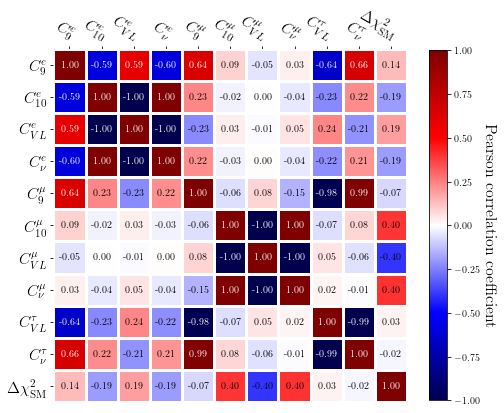

In [27]:
fig = plt.figure(figsize=(7,7))
im, cbar = heatmap(dfcoeff_corr, coeff_labels, coeff_labels, cbarlabel='Pearson correlation coefficient',
                   cmap=seismic, vmin=-1, vmax=1, cbar_kw={'shrink':0.72})
_ = annotate_heatmap(im, colorcorr=True)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/coeffcorr.pdf')

## Correlations between observables

In [11]:
def observables(i):
    d = {}
    d.update({'BR(B->Knunu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(B+->Knunu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(tau->mununu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(tau->mununu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(K->pinunu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(K+->pinunu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(B->mumu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(B0->mumu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(Bs->mumu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(Bs->mumu)', SMEFT19.scenarios.rotBII )})
    d.update({'RK*':SMEFT19.SMEFTglob.prediction(list(points.values[i]),  ('<Rmue>(B0->K*ll)', 1.1, 6.0), SMEFT19.scenarios.rotBII )})
    d.update({'RD*':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'Rtaul(B->Dlnu)', SMEFT19.scenarios.rotBII )})
    d.update({'logL':mldata.logL[i]})
    return d

In [12]:
with Pool(4) as pool:
    obs = pool.map(observables, range(len(points)))

In [13]:
dfobs = pd.DataFrame(obs)
dfobs.describe()

,BR(B->Knunu),BR(tau->mununu),BR(K->pinunu),BR(B->mumu),BR(Bs->mumu),RK*,RD*,logL
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,5.723400e-06,0.172793,9.456953e-11,1.143276e-10,3.681359e-09,0.863404,0.348514,26.206665
std,3.308137e-07,0.000051,3.839251e-11,1.614428e-13,3.177596e-11,0.045611,0.011422,1.653325
min,4.168223e-06,0.172523,6.414433e-11,1.136488e-10,3.666842e-09,0.627116,0.286511,16.303951
25%,5.511069e-06,0.172773,6.882381e-11,1.142739e-10,3.671890e-09,0.833738,0.341151,25.579850
50%,5.692937e-06,0.172803,8.164518e-11,1.143019e-10,3.674366e-09,0.863298,0.347490,26.583207
75%,5.892711e-06,0.172826,1.078647e-10,1.143424e-10,3.680482e-09,0.893964,0.354432,27.341048
max,8.547037e-06,0.172908,5.372121e-10,1.181738e-10,4.154151e-09,1.073829,0.436694,29.236080


In [14]:
dfobs.to_csv('../data/samples/observables.dat', sep='\t', index=False)

In [15]:
dfobs_corr = dfobs.corr()
dfobs_corr

,BR(B->Knunu),BR(tau->mununu),BR(K->pinunu),BR(B->mumu),BR(Bs->mumu),RK*,RD*,logL
BR(B->Knunu),1.000000,-0.386466,0.283689,0.017549,0.083268,-0.204654,0.990171,-0.009253
BR(tau->mununu),-0.386466,1.000000,-0.116653,-0.083892,0.040440,0.163407,-0.495128,-0.030631
BR(K->pinunu),0.283689,-0.116653,1.000000,-0.043735,-0.066226,-0.095893,0.287001,-0.151793
BR(B->mumu),0.017549,-0.083892,-0.043735,1.000000,0.581383,0.162092,0.040905,-0.236392
BR(Bs->mumu),0.083268,0.040440,-0.066226,0.581383,1.000000,0.191864,0.064794,-0.393589
RK*,-0.204654,0.163407,-0.095893,0.162092,0.191864,1.000000,-0.207680,-0.285605
RD*,0.990171,-0.495128,0.287001,0.040905,0.064794,-0.207680,1.000000,0.017434
logL,-0.009253,-0.030631,-0.151793,-0.236392,-0.393589,-0.285605,0.017434,1.000000


In [16]:
obs_labels = [r'BR($B^+\to K^+ \nu\bar{\nu}$)', r'BR($\tau^-\to \mu^- \nu\bar{\nu}$)',
              r'BR($K^+\to \pi^+ \nu\bar{\nu}$)', r'BR($B^0\to \mu^+ \mu^-$)', r'BR($B_s\to \mu^+ \mu^-$)',
              r'$R_{K^*}^{[1.1,6]}$', r'$R_D^\ell$', r'$\Delta\chi^2_\mathrm{SM}$']

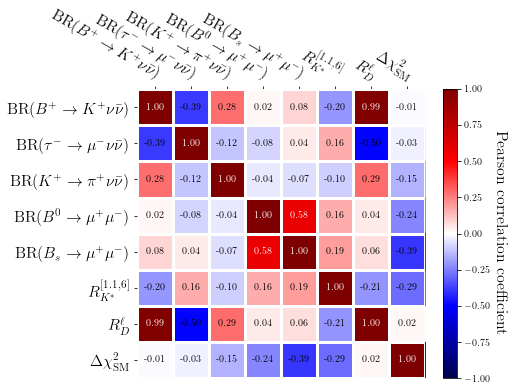

In [17]:
fig = plt.figure(figsize=(7,7))
im, cbar = heatmap(dfobs_corr, obs_labels, obs_labels, cbarlabel='Pearson correlation coefficient',
                   cmap=seismic, vmin=-1, vmax=1, cbar_kw={'shrink':0.65})
_ = annotate_heatmap(im, colorcorr=True)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/obscorr.pdf')

## Correlation between $R_D$ and $\mathrm{BR}(B\to K \nu\nu)$

In [18]:
import SMEFT19
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import flavio

In [19]:
Knunu_SM = flavio.sm_prediction('BR(B+->Knunu)')
Knunu_SMunc = flavio.sm_uncertainty('BR(B+->Knunu)')

In [20]:
m_RD = flavio.combine_measurements('Rtaul(B->Dlnu)')
RD_central = m_RD.get_central()
RD_eleft = m_RD.get_error_left()
RD_eright = m_RD.get_error_right()

3 of the measurements of 'Rtaul(B->Dlnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.


In [21]:
d_bf = SMEFT19.ellipse.load('../data/ellipses/rotBII.yaml')
RD_bf = flavio.np_prediction('Rtaul(B->Dlnu)', SMEFT19.scenarios.rotBII(d_bf['bf']))
BKnunu_bf = flavio.np_prediction('BR(B+->Knunu)', SMEFT19.scenarios.rotBII(d_bf['bf']))

FixedFormatter should only be used together with FixedLocator


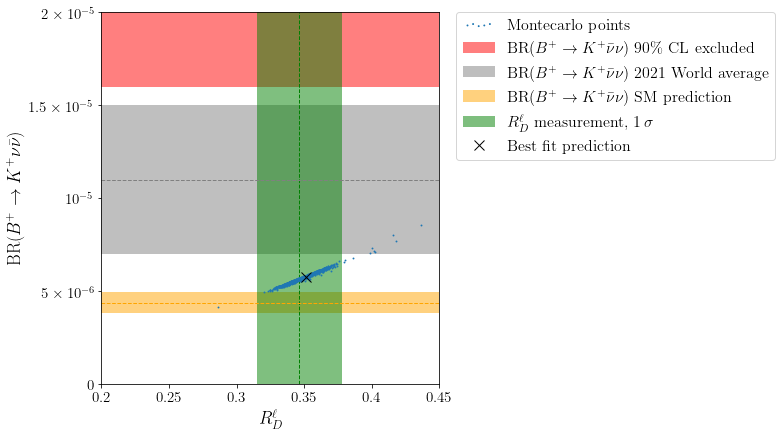

In [22]:
fig = plt.figure(figsize=(11,6))
plt.scatter(dfobs['RD*'], dfobs['BR(B->Knunu)'], s=0.8, label='Montecarlo points', zorder=4)
plt.xlim([0.2, 0.45])
plt.ylim([0, 2e-5])
ax = plt.gca()
ax.set_yticks([0, 0.5e-5, 1e-5, 1.5e-5, 2e-5])
_ = ax.set_yticklabels([r'$0$', r'$5\times10^{-6}$', r'$10^{-5}$', r'$1.5\times10^{-5}$', r'$2\times10^{-5}$'], fontsize=15)
plt.xlabel(r'$R_D^\ell$', fontsize=18)
plt.ylabel(r'BR($B^+\to K^+\nu\bar{\nu}$)', fontsize=18)
ax.add_patch(Rectangle( (0.2, 1.6e-5), 0.25, 4e-6, color='red', alpha=0.5, label=r'BR($B^+\to K^+\bar{\nu}\nu$) 90\% CL excluded', lw=0))
ax.add_patch(Rectangle( (0.2, 0.7e-5), 0.25, 2*0.4e-5, color='gray', alpha=0.5, label=r'BR($B^+\to K^+\bar{\nu}\nu$) 2021 World average', lw=0))
ax.add_patch(Rectangle( (0.2, Knunu_SM-Knunu_SMunc), 0.25, 2*Knunu_SMunc, color='orange', alpha=0.5, label=r'BR($B^+\to K^+\bar{\nu}\nu$) SM prediction', lw=0))
ax.add_patch(Rectangle( (RD_central-RD_eleft, 0), RD_eleft+RD_eright, 3e-5, color='green', alpha=0.5, label=r'$R_D^\ell$ measurement, $1\,\sigma$', lw=0))
plt.axvline(RD_central, lw=1, ls='dashed', color='green')
plt.axhline(Knunu_SM, lw=1, ls='dashed', color='orange')
plt.axhline(1.1e-5, lw=1, ls='dashed', color='gray')
plt.plot(RD_bf, BKnunu_bf, marker='x', color='black', markersize=10, zorder=5, label ='Best fit prediction', lw=0)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., scatterpoints=5)
ax.set_xticklabels(['$0.2$',r'$0.25$',r'$0.3$',r'$0.35$',r'$0.4$',r'$0.45$'], fontsize=15)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/RD_BKnunu.pdf')